#**IRWA 2024 - PROJECT**
#**Part 1: Text Processing and Exploratory Data Analysis**
##**G102_2**

Roger Sola (u199780)

Queralt Zamora (u199903)

Clàudia Morales (u199906)




<font size="+2">1. Introduction</font>

*You are provided with a document corpus which is a set of tweets related to the Farmers
Protests 2021.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# TO BE MODIFIED WITH THE DIRECTORY FROM THE TEACHER

docs_path = '/content/drive/MyDrive/1st TERM/RIAW/LABS/PART 1/data/farmers-protest-tweets.json'
#docs_path = '/content/drive/MyDrive/UPF/4t Any/RIAW/LABS/PART 1/data/farmers-protest-tweets.json'
#docs_path = '/content/drive/MyDrive/4t/T1/RIAW/LABS/PART 1/data/farmers-protest-tweets.json'

In [3]:
# TO BE MODIFIED WITH THE DIRECTORY FROM THE TEACHER

ids_path = '/content/drive/MyDrive/1st TERM/RIAW/LABS/PART 1/data/tweet_document_ids_map.csv'
#ids_path  = '/content/drive/MyDrive/UPF/4t Any/RIAW/LABS/PART 1/data/tweet_document_ids_map.csv'


<font size="+2">2. Preprocessing Data</font>

1.  *Removing stop words*
1.  *Tokenization*
2.  *Removing punctuation marks*
1.  *Stemming*
2.  *and... anything else you think it's needed (bonus point)*

*HINTS:*

*1. Take into account that for future queries, the final output must return (when present)
the following information for each of the selected documents: Tweet | Date | Hashtags
| Likes | Retweets | Url (here the “Url” means the tweet link).*

*2. Consider your approach to hashtags during pre-processing, such as the decision to retain
or remove the "#" symbol. Their distinctiveness might be valuable when treated as
separate terms in the inverted index. As guidance, turn to the evaluation file
(evaluation_gt) which will become pivotal in the project’s second phase. Using a subset
of the dataset, the evaluation_gt sets a baseline with three distinct information needs
and their respective ground truths, indicating if a document is relevant (1) or not (0) to
an information need. For context, one of these information needs relates to discussions
about Indian goverment. Reflect on how this context might shape your strategy for
hashtag handling.*

*3. Suggested library that may help you in stemming and stop words: nltk*


*Make sure you map the tweet’s Ids with the document ids as the document Ids will be
considered for the evaluation stage of the project (tweet_document_ids_map).*

In [4]:
import json
import nltk # (HINT 3)
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import string
import spacy
from IPython.display import Markdown, display
import numpy as np

In [5]:
def create_markdown(title):
    display(Markdown(f'### {title}'))

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<font size="+1">2.1. - 2.5. Preprocessesing function
</font>

In [6]:
# preprocessing function
def preprocess_text(text):
    text = text.lower() # 2.1. convert text to lowercase
    text = re.sub(r'http\S+|www\S+', '', text) # 2.2. remove URLs
    hashtags = re.findall(r'#\S+', text) # 2.3. extract hashtags separately (HINT 2)
    text = re.sub(r'#\w+', '', text) # 2.3. delete hastags from main tweet (HINT 2)
    # more preprocess methods
    text = text.strip() # 2.4. removing spaces at the beginning and spaces at the end
    text = re.sub(r'\s+', ' ', text) # 2.4. changing double spaces to single spaces.

    tokens = word_tokenize(text) # 2.5. tokenize text
    filtered_tokens = [stemmer.stem(word) for word in tokens if word not in stop_words and word not in punctuation ] # remove punctuation and stop words, and apply stemming

    return filtered_tokens, hashtags

<font size="+1">2.6. Preprocessed Tweets storage
</font>

In [7]:
# 2.6. read and preprocess the data line by line from .json file
preprocessed_tweets = []
with open(docs_path, 'r') as file:
    for line in file:
        try:
            tweet = json.loads(line)

            # extract relevant information
            tweet_id = tweet.get('id')
            content = tweet.get('content')
            preprocessed_content,hashtags = preprocess_text(content)
            preprocessed_tweets.append({
                'id': tweet_id,
                'preprocessed_content': preprocessed_content,
                'date': tweet.get('date'),
                'hashtags': hashtags,
                'likes': tweet.get('likeCount'),
                'retweets': tweet.get('retweetCount'),
                'url': tweet.get('url')
            })
        except json.JSONDecodeError as e:
            print(f"Error parsing line: {e}")

In [8]:
# function to contain all necessary tweet and document information
def return_tweet_info(preprocessed_tweets):

    df = pd.DataFrame(preprocessed_tweets) # create DataFrame

    # new dataframe with desired information
    tweet_info = pd.DataFrame({
        'Tweet ID': df['id'],
        'Tweet': df['preprocessed_content'].apply(lambda x: ' '.join(x)),
        'Date': df['date'],
        'Hashtags': df['hashtags'].apply(lambda x: ', '.join(x) if x else 'None'),
        'Likes': df['likes'],
        'Retweets': df['retweets'],
        'Url': df['url']
    })

    return tweet_info

In [9]:
tweet_info_df = return_tweet_info(preprocessed_tweets)
display(tweet_info_df)

,Tweet ID,Tweet,Date,Hashtags,Likes,Retweets,Url
0,1364506249291784198,world progress indian polic govt still tri tak...,2021-02-24T09:23:35+00:00,"#modidontsellfarmers, #farmersprotest, #freeno...",0,0,https://twitter.com/ArjunSinghPanam/status/136...
1,1364506237451313155,kisanektamorcha farmer constantli distroy crop...,2021-02-24T09:23:32+00:00,"#farmersprotest, #modiignoringfarmersdeaths, #...",0,0,https://twitter.com/PrdeepNain/status/13645062...
2,1364506195453767680,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ ਮੇਰੇ...,2021-02-24T09:23:22+00:00,#farmersprotest,0,0,https://twitter.com/parmarmaninder/status/1364...
3,1364506167226032128,reallyswara rohini_sgh watch full video,2021-02-24T09:23:16+00:00,"#farmersprotest, #nofarmersnofood",0,0,https://twitter.com/anmoldhaliwal/status/13645...
4,1364506144002088963,,2021-02-24T09:23:10+00:00,"#kisanektamorcha, #farmersprotest, #nofarmersn...",0,0,https://twitter.com/KotiaPreet/status/13645061...
...,...,...,...,...,...,...,...
117402,1360040182771163138,,2021-02-12T01:37:02+00:00,"#farmersprotest, #kisanandolan, #kisaanmajdoor...",0,0,https://twitter.com/rickyrickstir/status/13600...
117403,1360040146402373637,pm मोदी की अपील के बीच संयुक्त किसान मोर्चा का...,2021-02-12T01:36:53+00:00,"#farmersprotest, #kisanaandolan, #farmersfury,...",0,0,https://twitter.com/PunjabTak/status/136004014...
117404,1360040134230556678,unit stand divid fall,2021-02-12T01:36:50+00:00,"#mahapanchayatrevolution, #farmersprotest",39,65,https://twitter.com/ish_kayy/status/1360040134...
117405,1360040127679000577,सिंघु बॉर्डर पर लंबी लड़ाई की तैयारी किसानों न...,2021-02-12T01:36:49+00:00,"#farmersprotest, #msp, #farmbill2020, #singhub...",15,1,https://twitter.com/TV9Bharatvarsh/status/1360...


<font size="+1">2.7. Map IDs</font>

In [10]:
# 2.7. map the tweet’s ids with the document ids
# ids csv loaded
tweet_ids_map = pd.read_csv(ids_path)
display(tweet_ids_map)

,docId,id
0,doc_0,1364506249291784198
1,doc_1,1364506237451313155
2,doc_2,1364506167226032128
3,doc_3,1364505991887347714
4,doc_4,1364505813834989568
...,...,...
48424,doc_48424,1360040232733708294
48425,doc_48425,1360040229265022979
48426,doc_48426,1360040195786067969
48427,doc_48427,1360040134230556678


In [11]:
# merged the tweet_info_df with the tweet_ids_map based on the 'Tweet ID' column
# 'id' in tweet_ids_map corresponds to 'Tweet ID' in tweet_info_df
tweet_info_df = tweet_info_df.merge(tweet_ids_map, left_on='Tweet ID', right_on='id', how='left')

# renamed 'docid' column from tweet_ids_map to 'Document ID' in the merged DataFrame
tweet_info_df = tweet_info_df.rename(columns={'docId': 'Document ID'})

# drop the column 'id' to not have repeated columns
tweet_info_df = tweet_info_df.drop(columns=['id'])

display(tweet_info_df)

,Tweet ID,Tweet,Date,Hashtags,Likes,Retweets,Url,Document ID
0,1364506249291784198,world progress indian polic govt still tri tak...,2021-02-24T09:23:35+00:00,"#modidontsellfarmers, #farmersprotest, #freeno...",0,0,https://twitter.com/ArjunSinghPanam/status/136...,doc_0
1,1364506237451313155,kisanektamorcha farmer constantli distroy crop...,2021-02-24T09:23:32+00:00,"#farmersprotest, #modiignoringfarmersdeaths, #...",0,0,https://twitter.com/PrdeepNain/status/13645062...,doc_1
2,1364506195453767680,ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ ਮੇਰੇ...,2021-02-24T09:23:22+00:00,#farmersprotest,0,0,https://twitter.com/parmarmaninder/status/1364...,NaN
3,1364506167226032128,reallyswara rohini_sgh watch full video,2021-02-24T09:23:16+00:00,"#farmersprotest, #nofarmersnofood",0,0,https://twitter.com/anmoldhaliwal/status/13645...,doc_2
4,1364506144002088963,,2021-02-24T09:23:10+00:00,"#kisanektamorcha, #farmersprotest, #nofarmersn...",0,0,https://twitter.com/KotiaPreet/status/13645061...,NaN
...,...,...,...,...,...,...,...,...
117402,1360040182771163138,,2021-02-12T01:37:02+00:00,"#farmersprotest, #kisanandolan, #kisaanmajdoor...",0,0,https://twitter.com/rickyrickstir/status/13600...,NaN
117403,1360040146402373637,pm मोदी की अपील के बीच संयुक्त किसान मोर्चा का...,2021-02-12T01:36:53+00:00,"#farmersprotest, #kisanaandolan, #farmersfury,...",0,0,https://twitter.com/PunjabTak/status/136004014...,NaN
117404,1360040134230556678,unit stand divid fall,2021-02-12T01:36:50+00:00,"#mahapanchayatrevolution, #farmersprotest",39,65,https://twitter.com/ish_kayy/status/1360040134...,doc_48427
117405,1360040127679000577,सिंघु बॉर्डर पर लंबी लड़ाई की तैयारी किसानों न...,2021-02-12T01:36:49+00:00,"#farmersprotest, #msp, #farmbill2020, #singhub...",15,1,https://twitter.com/TV9Bharatvarsh/status/1360...,NaN


In [12]:
print('There are a total of',len(tweet_info_df),'tweets')

There are a total of 117407 tweets


In [13]:
# verify the number of entries maped
print(f"Number of entries maped: {len(tweet_ids_map)}")

Number of entries maped: 48429


<font size="+1">2.8. Output display</font>

In [14]:
# 2.8. printing method as demanded (HINT 1)
print("Tweet | Date | Hashtags | Likes | Retweets | Url")
print()
for index, row in tweet_info_df.head().iterrows():
    print(index, f"| {row['Tweet']} | {row['Date']} | {row['Hashtags']} | {row['Likes']} | {row['Retweets']} | {row['Url']}")

# print one of the most retweeted tweets to see if the variables of the number of likes/retweets are correctly created.
most_retweeted_tweet = tweet_info_df.iloc[111329]
print(f"{most_retweeted_tweet.name} | {most_retweeted_tweet['Tweet']} | {most_retweeted_tweet['Date']} | {most_retweeted_tweet['Hashtags']} | {most_retweeted_tweet['Likes']} | {most_retweeted_tweet['Retweets']} | {most_retweeted_tweet['Url']}")

Tweet | Date | Hashtags | Likes | Retweets | Url

0 | world progress indian polic govt still tri take india back horrif past tyranni narendramodi delhipolic shame | 2021-02-24T09:23:35+00:00 | #modidontsellfarmers, #farmersprotest, #freenodeepkaur | 0 | 0 | https://twitter.com/ArjunSinghPanam/status/1364506249291784198
1 | kisanektamorcha farmer constantli distroy crop throughout india realli 's heart break ... care crop like children govt agricultur minist laugh us🚜🌾w win💪 | 2021-02-24T09:23:32+00:00 | #farmersprotest, #modiignoringfarmersdeaths, #modidontsellfarmers | 0 | 0 | https://twitter.com/PrdeepNain/status/1364506237451313155
2 | ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ ਮੇਰੇ ਹਿਸਾਬ ਨਾਲ ਬਾਹਰ ਪ੍ਰਦੇਸ਼ ਜਾਣ ਨਾਲੋਂ ਬਿਹਤਰ ਆ ਭਾਰਤ ਚ ਪੈਟਰੋਲ ਪੰਪ ਪਾ ਲਈਏ। 🤫🤫🤔🤔 | 2021-02-24T09:23:22+00:00 | #farmersprotest | 0 | 0 | https://twitter.com/parmarmaninder/status/1364506195453767680
3 | reallyswara rohini_sgh watch full video | 2021-02-24T09:23:16+00:00 | #farmersprotest, #nofarmersnofood | 0 | 0 

It was decided to not take out the emogis since then, the special characters in indian would be also be deleted, leaving some tweets in blank.

<font size="+2">3. Data Analysis</font>

*When working with data, it is important to have a better understanding of the content and
some statistics. Provide an exploratory data analysis to describe the dataset you are working on
in this project and explain the decisions made for the analysis. For example, word counting
distribution, average sentence length, vocabulary size, ranking of tweets most retweeted, word
clouds for the most frequent words, and entity recognition. Feel free to do the exploratory
analysis and report your findings in the report.*

<font size="+1">3.1. Word count distribution</font>

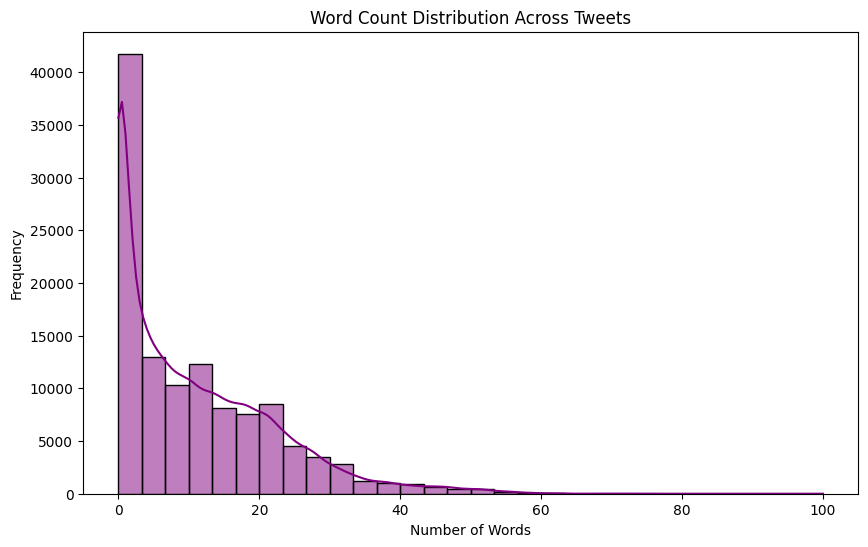

In [15]:
# 3.1. Word count distribution

# create_markdown("1. Word count distribution")
word_count = tweet_info_df['Tweet'].apply(lambda x: len(x.split())) # num of words per tweet
plt.figure(figsize=(10, 6))
sns.histplot(word_count, kde=True, bins=30, color = 'purple')
plt.title('Word Count Distribution Across Tweets')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

The number of words in tweets seems to follow a geometric (or exponential) distribution. Therefore, we can say that tweets tend to be short texts. In fact, there is a peak at the beginning, indicating that most of them do not exceed 5 to 10 words.

<font size="+1">3.2. Average sentence length</font>

In [16]:
# 3.2. Average sentence length

#create_markdown("2. Average sentence length")
average_sentence_length = word_count.mean()
print(f"Average number of words per tweet: {average_sentence_length:.2f}")

Average number of words per tweet: 10.87


We calculated the average sentence length across all tweets to provide how much the users tend to write in their tweets. In the result, we can see that the average tweet length contains around 10 words which makes sense observing the previous section. This tells us that most users are concise at the moment to write their tweets.

<font size="+1">3.3. Vocabulary size</font>

In [17]:
# 3.3. Vocabulary size

#create_markdown("3. Vocabulary size")
all_words = ' '.join(tweet_info_df['Tweet']).split() # combine all words from the tweets
vocabulary = set(all_words)
vocab_size = len(vocabulary)# Count unique words (vocabulary size)
print(f"Vocabulary size (unique words): {vocab_size}")

Vocabulary size (unique words): 104894


To observe the diversity of the language used in the dataset we calculated the vocabulary size, the number of unique words across all tweets. We get as a result a total of 104894 unique words, indicating a rich and diverse use of the language.

<font size="+1">3.4. Ranking of tweets based on Likes and Retweets</font>

In [18]:
# 3.4. Ranking of tweets based on Likes and Retweets

create_markdown("Ranking of tweets based on Likes and Retweets")

top_retweeted = tweet_info_df[['Tweet', 'Retweets', 'Url']].sort_values(by='Retweets', ascending=False).head(10)
create_markdown("Top 10 Most Retweeted Tweets:")
display(top_retweeted)

top_liked = tweet_info_df[['Tweet', 'Likes', 'Url']].sort_values(by='Likes', ascending=False).head(10)
create_markdown("Top 10 Liked Tweets:")
display(top_liked)

### Ranking of tweets based on Likes and Retweets

### Top 10 Most Retweeted Tweets:

,Tweet,Retweets,Url
111329,मध्यप्रदेश में निजी व्यापारी 200 करोड़ का धान ...,7723,https://twitter.com/RakeshTikaitBKU/status/136...
7645,'s happen germani german govt ’ block path bar...,6164,https://twitter.com/dhruv_rathee/status/136414...
89780,disha ravi 21-year-old climat activist arrest ...,4673,https://twitter.com/rupikaur_/status/136088206...
88911,disha ravi broke court room told judg mere edi...,3742,https://twitter.com/amaanbali/status/136090860...
111556,farmer sweet ’ see amandacerni rihanna 🖤🥺,3332,https://twitter.com/jedijasmin_/status/1360162...
64492,india target young women silenc dissent amp mu...,3230,https://twitter.com/rupikaur_/status/136179092...
108072,bollywood betray panjab amp farmer india hero ...,3182,https://twitter.com/RaviSinghKA/status/1360260...
60721,लहरों को ख़ामोश देख कर ये ना समझना कि समंदर मे...,3057,https://twitter.com/sherryontopp/status/136189...
29510,हाँ मैं जानता हूँ कि मैं शायर नहीं और ज़ुल्म क...,3040,https://twitter.com/sherryontopp/status/136309...
24160,कलियुग है साहब यहाँ झूठे को स्वीकार किया जाता ...,2622,https://twitter.com/sherryontopp/status/136337...


### Top 10 Liked Tweets:

,Tweet,Likes,Url
7645,'s happen germani german govt ’ block path bar...,27888,https://twitter.com/dhruv_rathee/status/136414...
111329,मध्यप्रदेश में निजी व्यापारी 200 करोड़ का धान ...,25824,https://twitter.com/RakeshTikaitBKU/status/136...
60721,लहरों को ख़ामोश देख कर ये ना समझना कि समंदर मे...,19284,https://twitter.com/sherryontopp/status/136189...
29510,हाँ मैं जानता हूँ कि मैं शायर नहीं और ज़ुल्म क...,19198,https://twitter.com/sherryontopp/status/136309...
111556,farmer sweet ’ see amandacerni rihanna 🖤🥺,17325,https://twitter.com/jedijasmin_/status/1360162...
24160,कलियुग है साहब यहाँ झूठे को स्वीकार किया जाता ...,15582,https://twitter.com/sherryontopp/status/136337...
108072,bollywood betray panjab amp farmer india hero ...,12949,https://twitter.com/RaviSinghKA/status/1360260...
83016,मेरी दोस्ती का फ़ायदा उठा लेना क्योंकि मेरे वि...,12782,https://twitter.com/sherryontopp/status/136113...
69436,गढ़ी सांपला की पंचायत में पधारे सभी किसानों का...,12317,https://twitter.com/RakeshTikaitBKU/status/136...
89423,wish fli delhi border look tough time farmer f...,12273,https://twitter.com/avinashkalla/status/136089...


Analysing the previous results, we can see that 7 out of 10 in each top list coincide. Therefore, a tweet with many retweets is likely to have more likes and a tweet with many likes is likely to have more retweets.

<font size="+1"> 3.5. WordCloud of the most frequent words</font>

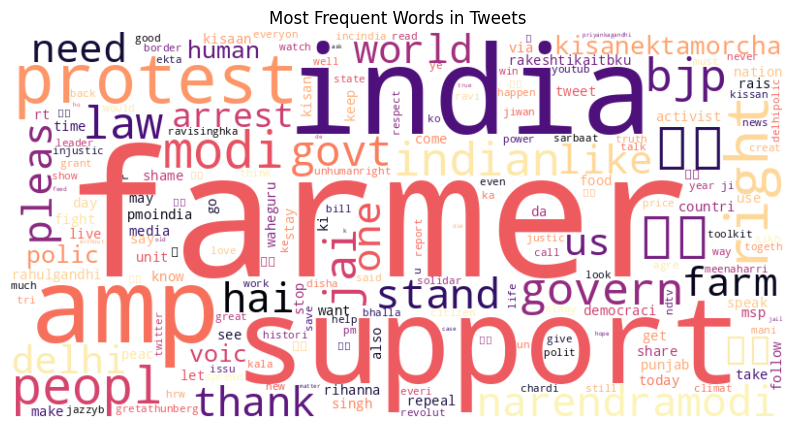

In [19]:
# 3.5. WordCloud of the most frequent words

#create_markdown("WordCloud of the most frequent words")

# filter out stop words and punctuation, and count word frequencies
word_frequencies = Counter(
    word.strip(string.punctuation).lower() for word in all_words
    if word.lower() not in stop_words and word.strip(string.punctuation) != '' and word.isalpha() #special characters and punctuations out
)

# generate the word cloud
wordcloud = WordCloud(width=800, height=400,colormap='magma_r', background_color='white').generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Tweets')
plt.show()

The most frequent words make quite a lot of sense if we consider the main topic of these tweets: "Farmers Protests of 2021." Therefore, we can see that 'farmer' is the most significant word, apart from 'support', 'protest', and 'india'. Additionally, it could be deduced that these protests took place in India, if it was the case that we did not have this information.

<font size="+1">3.6. Hashtags Analysis</font>

In [20]:
# 3.6. Hashtags Analysis

create_markdown("Top 10 Most common hashtags")
all_hashtags = []

# iterate over each row in the 'Hashtags' column
for hashtags in tweet_info_df['Hashtags']:

    # extract hashtags that start with '#' and stop before a space/comma
    extracted_hashtags = re.findall(r'#\S+[^,\s]', hashtags)
    all_hashtags.extend(extracted_hashtags)

# count the frequency of each hashtag
hashtag_counts = Counter(all_hashtags)

hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count'])
hashtag_df = hashtag_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
display(hashtag_df.head(10))


### Top 10 Most common hashtags

,Hashtag,Count
0,#farmersprotest,118114
1,#releasedetainedfarmers,5998
2,#farmersmakeindia,5346
3,#mahapanchayatrevolution,4863
4,#repealonlywayahead,4617
5,#indiabeingsilenced,4506
6,#farmersprotests,3747
7,#standwithfarmers,3652
8,#pagdi_sambhal_jatta,3550
9,#railrokoforfarmers,3102


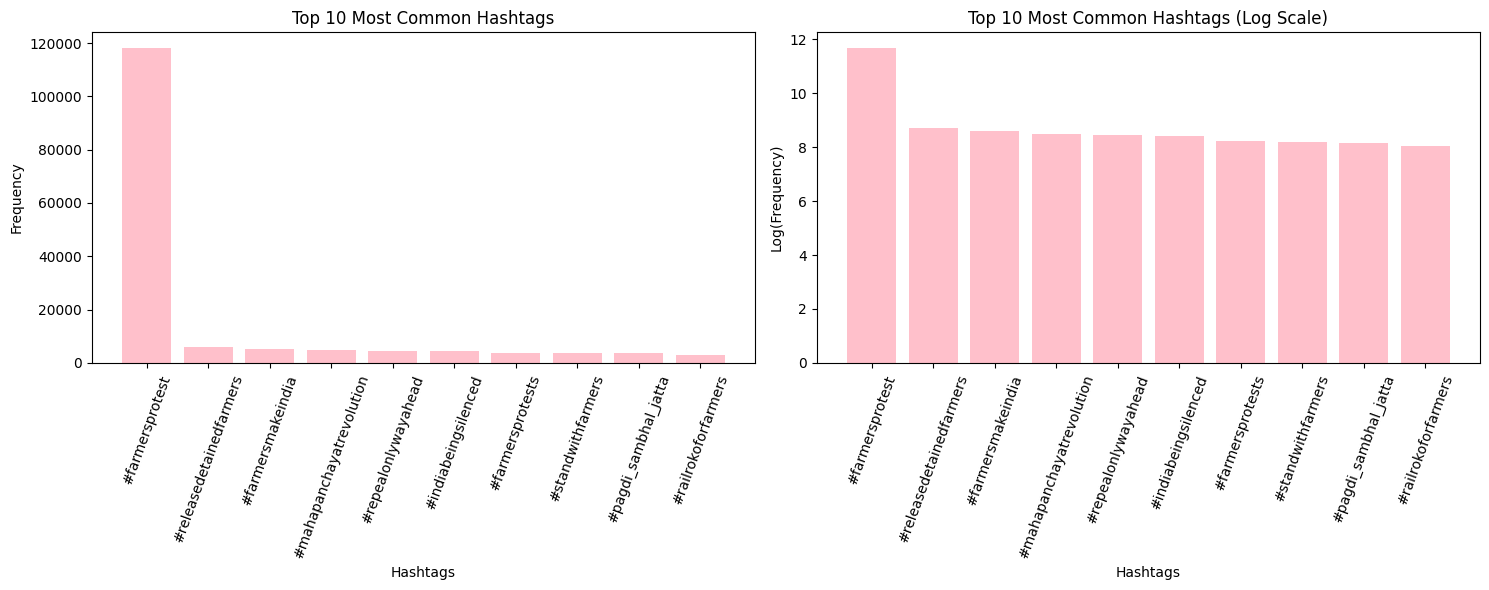

In [21]:
top_hashtags = hashtag_counts.most_common(10)
labels, values = zip(*top_hashtags)

plt.figure(figsize=(15, 6))

# plot 1
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.bar(labels, values, color='pink')
plt.title('Top 10 Most Common Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.xticks(rotation=70)

# plot 2
plt.subplot(1, 2, 2)  # (rows, columns, panel number)
log_values = np.log1p(values)  # Using log1p for stability (log(1 + x))
plt.bar(labels, log_values, color='pink')
plt.title('Top 10 Most Common Hashtags (Log Scale)')
plt.xlabel('Hashtags')
plt.ylabel('Log(Frequency)')
plt.xticks(rotation=70)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In this sixth section, the table and plot reveal that the hashtag #FarmersProtest stands out as the most popular, significantly outpacing the others. However, due to the scale used in the plot, it is really difficult to see the differences in popularity among the remaining hashtags. So we applied a logarithmic scale to enhance visual clarity and make the differences more clear.

<font size="+1">3.7. Relation between number of likes and number of hashtags
</font>

It is believed that tweets with more hashtags tend to receive more likes. In other words, a higher number of hashtags is associated with a greater number of likes.

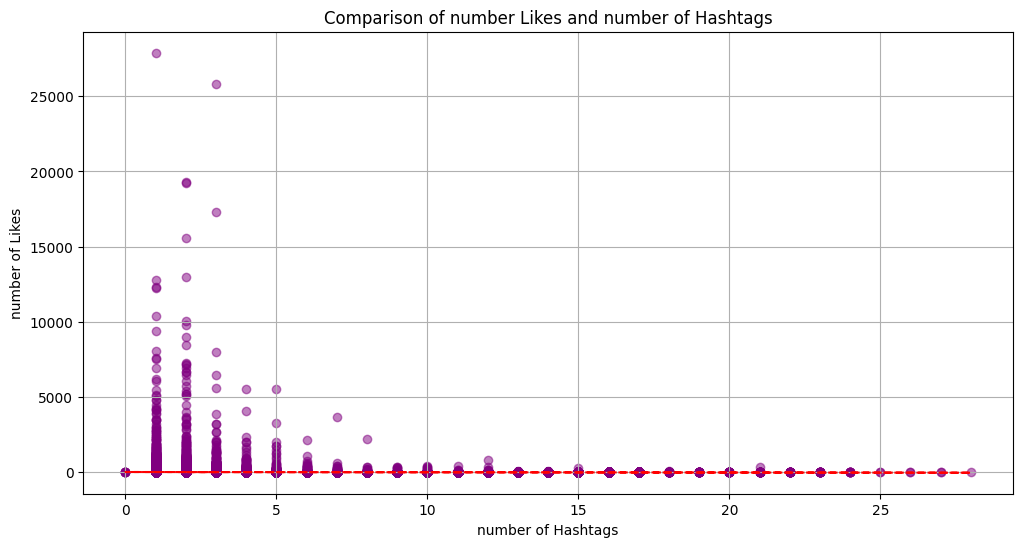

In [22]:
# 3.7. Relation between number of likes and number of hashtags

def count_hashtags(text):
    return len(re.findall(r'#\S+[^,\s]', text))

hashtag_counts = tweet_info_df['Hashtags'].apply(count_hashtags)

likes = tweet_info_df['Likes']

plt.figure(figsize=(12, 6))
plt.scatter(hashtag_counts, likes, alpha=0.5, color='purple')
plt.title('Comparison of number Likes and number of Hashtags')
plt.xlabel('number of Hashtags')
plt.ylabel('number of Likes')

z = np.polyfit(hashtag_counts, likes, 1)
p = np.poly1d(z)
plt.plot(hashtag_counts, p(hashtag_counts), color='red', linestyle='--')

plt.grid()
plt.show()

As observed, our initial expectation was incorrect. Tweets with more likes tend to have fewer hashtags, and the number of likes decreases as the number of hashtags increases.